In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
train_dir = "C:\\Users\\hp\\Downloads\\cifar-10-img\\cifar-10-img\\train"
test_dir = "C:\\Users\\hp\\Downloads\\cifar-10-img\\cifar-10-img\\test"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

In [ ]:
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.


In [ ]:
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 9921 images belonging to 10 classes.


In [ ]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [ ]:
weights_path = "C:\\Users\\hp\\Downloads\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [ ]:
for layer in base_model.layers:
   layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 66s 749ms/step - accuracy: 0.2338 - loss: 2.1125 - val_accuracy: 0.4340 - val_loss: 1.5740
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 60s 755ms/step - accuracy: 0.4219 - loss: 1.6212 - val_accuracy: 0.4970 - val_loss: 1.4007
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 58s 736ms/step - accuracy: 0.4881 - loss: 1.4350 - val_accuracy: 0.5140 - val_loss: 1.3675
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 58s 734ms/step - accuracy: 0.5105 - loss: 1.3606 - val_accuracy: 0.5210 - val_loss: 1.3610
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 745ms/step - accuracy: 0.5330 - loss: 1.3025 - val_accuracy: 0.5500 - val_loss: 1.3034
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 64s 804ms/step - accuracy: 0.5701 - loss: 1.2321 - val_accuracy: 0.5550 - val_loss: 1.2853
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 63s 793ms/step - accuracy: 0.5987 - loss: 1.1439 - val_accuracy: 0.5440 - val_loss: 1.3056
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 58s 734ms/step - accuracy: 0.5978 - loss: 1.1131 - val_accu

In [ ]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step


In [ ]:
labels = list(test_generator.class_indices.keys())

Preditcted:  truck
Actual:  truck


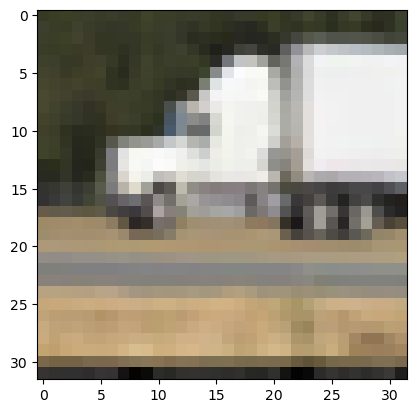

In [ ]:
n = 890
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  dog
Actual:  dog


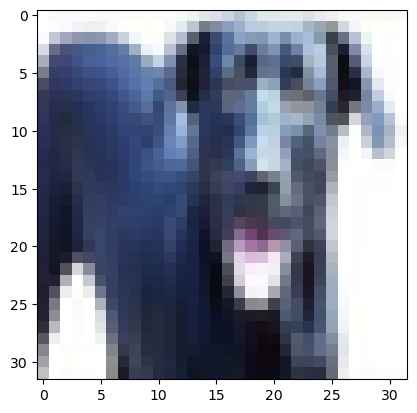

In [ ]:
n = 590
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  deer
Actual:  deer


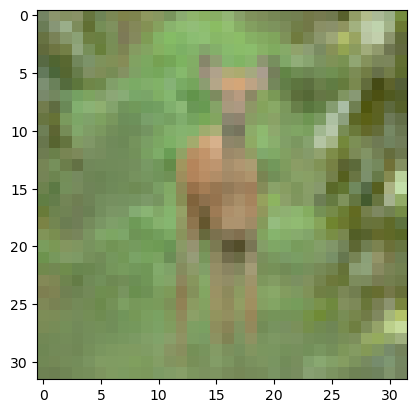

In [ ]:
n = 600
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])